<a href="https://colab.research.google.com/github/CallumPaton/analysing-most-competitve-f1-season/blob/main/F1_data_analysis_dominance_check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive

In [ ]:
# Mount the google drive containing data taken from kaggle (https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020)
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/F1-data-analysis'
driver_standings = pd.read_csv(f'{file_path}/driver_standings.csv')
constructor_standings = pd.read_csv(f'{file_path}/constructor_standings.csv')

races = pd.read_csv(f'{file_path}/races.csv')

In [ ]:
# Adding the season ID to the driver standings data
driver_standings = driver_standings.merge(races[['raceId','year']], on='raceId')
constructor_standings = constructor_standings.merge(races[['raceId','year']], on='raceId')
drivers = pd.read_csv(f'{file_path}/drivers.csv')

In [ ]:
constructor_standings.head()

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins,year
0,1,18,1,14.0,1,1,1,2008
1,2,18,2,8.0,3,3,0,2008
2,3,18,3,9.0,2,2,0,2008
3,4,18,4,5.0,4,4,0,2008
4,5,18,5,2.0,5,5,0,2008


In [ ]:
def get_final_standings(df,driver):
  # Filter to keep only the rows corresponding to the final race of each year
  final_race_results = df[df.groupby('year')['raceId'].transform(max) == df['raceId']]

  # Sort the DataFrame by 'year' and 'driverId'
  if driver:
    final_race_results = final_race_results.sort_values(by=['year', 'driverId'])
    final_race_results = final_race_results[['year', 'driverId', 'points']]
  else:
    final_race_results = final_race_results.sort_values(by=['year', 'constructorId'])
    final_race_results = final_race_results[['year', 'constructorId', 'points']]
  # Display the final race results
  return final_race_results

drivers_standings_final = get_final_standings(driver_standings, True)
constructors_standings_final = get_final_standings(constructor_standings,False)

constructors_standings_final.tail()


,year,constructorId,points
13042,2023,117,196.0
13044,2023,131,247.0
13049,2023,210,11.0
13048,2023,213,3.0
13046,2023,214,57.0


In [ ]:
# filter data to only be from 1990 onwards
constructors_standings_final = constructors_standings_final[(constructors_standings_final['year'] >= 1990) & (constructors_standings_final['year'] < 2023)]
drivers_standings_final = drivers_standings_final[(drivers_standings_final['year'] >= 1990) & (drivers_standings_final['year'] < 2023)]

In [ ]:
def FindDriver(driverId):
  print(drivers[drivers['driverId']==driverId]['driverRef'].to_string(index=False))

In [ ]:
FindDriver(852)

tsunoda


In [ ]:
import matplotlib.pyplot as plt
def dominance_check(drivers_df, constructors_df):
    # Calculate the maximum points scored by any driver in each year for drivers
    max_points_by_year_drivers = drivers_df.groupby('year')['points'].max().reset_index()

    # Calculate the maximum points scored by any constructor in each year for constructors
    max_points_by_year_constructors = constructors_df.groupby('year')['points'].max().reset_index()

    # Calculate the total points scored by all drivers in each year for drivers
    total_points_by_year_drivers = drivers_df.groupby('year')['points'].sum().reset_index()

    # Calculate the total points scored by all constructors in each year for constructors
    total_points_by_year_constructors = constructors_df.groupby('year')['points'].sum().reset_index()

    # Merge the maximum and total points by year into a single DataFrame for drivers
    merged_df_drivers = max_points_by_year_drivers.merge(total_points_by_year_drivers, on='year', suffixes=('_max', '_total'))

    # Merge the maximum and total points by year into a single DataFrame for constructors
    merged_df_constructors = max_points_by_year_constructors.merge(total_points_by_year_constructors, on='year', suffixes=('_max', '_total'))

    # Calculate the percentage won by the champion for each year for drivers
    merged_df_drivers['percentage_won_by_champion'] = (merged_df_drivers['points_max'] / merged_df_drivers['points_total']) * 100

    # Calculate the percentage won by the champion for each year for constructors
    merged_df_constructors['percentage_won_by_champion'] = (merged_df_constructors['points_max'] / merged_df_constructors['points_total']) * 100

    # Create a new DataFrame with 'year' and 'percentage_won_by_champion' columns for drivers
    dominance_stat_drivers = merged_df_drivers[['year', 'percentage_won_by_champion']]

    # Create a new DataFrame with 'year' and 'percentage_won_by_champion' columns for constructors
    dominance_stat_constructors = merged_df_constructors[['year', 'percentage_won_by_champion']]

    # Create a single bar chart with side-by-side bars for both drivers and constructors
    fig, ax = plt.subplots(figsize=(15, 6))
    width = 0.35
    x = merged_df_drivers['year']

    ax.bar(x - width/2, merged_df_drivers['percentage_won_by_champion'], width, label='Drivers', color='skyblue')
    ax.bar(x + width/2, merged_df_constructors['percentage_won_by_champion'], width, label='Constructors', color='lightcoral')

    ax.set_xlabel('Year',fontsize=16)
    ax.set_ylabel('% of Points Available Held by Champion',fontsize=16)
    ax.set_xticks(x)
    ax.set_xticklabels(x, rotation=45,fontsize=14)
    ax.legend(fontsize=14)

    plt.tight_layout()

    # Show the plot
    plt.show()



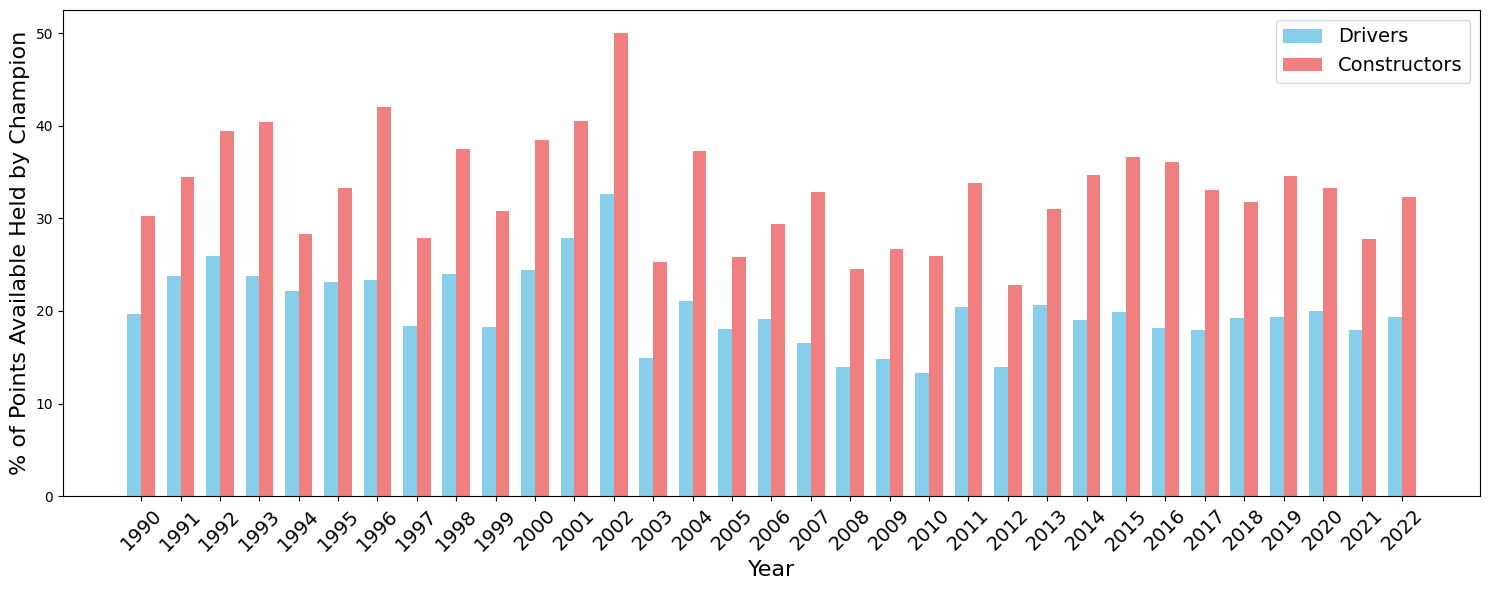

In [ ]:
dominance_check(drivers_standings_final, constructors_standings_final)